In [71]:
from sklearn.linear_model import LogisticRegression
from multiprocessing import Pool
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
train_transaction = pd.read_csv('./train_transaction.csv')
test_transaction = pd.read_csv('./test_transaction.csv')
print('train transaction size:', len(train_transaction))
print('test transaction size:', len(test_transaction))


train transaction size: 590540
test transaction size: 506691
Wall time: 1min 23s


In [3]:
%%time
train_transaction_new = pd.DataFrame(train_transaction, columns=train_transaction.isnull().sum().sort_values()[:196].index)
#train_transaction_new = train_transaction_new.drop(columns=['TransactionID'])
train_transaction_new.drop(['TransactionID'], axis=1)
train_transaction_new_label = train_transaction_new.isFraud
#train_transaction_new = train_transaction_new.drop(columns=['isFraud'])
train_transaction_new.drop(['isFraud'], axis=1)

test_transaction_new = pd.DataFrame(test_transaction, columns=train_transaction.isnull().sum().sort_values()[:196].index)
#test_transaction_new = test_transaction_new.drop(columns=['isFraud', 'TransactionID'])
test_transaction_new.drop(['isFraud'], axis=1)
test_transaction_new.drop(['TransactionID'], axis=1)


Wall time: 51.4 s
Parser   : 280 ms


In [4]:
%%time
labelencoder = LabelEncoder()

test_transaction_new['ProductCD'] = labelencoder.fit_transform(test_transaction_new['ProductCD'])
train_transaction_new['ProductCD'] = labelencoder.fit_transform(train_transaction_new['ProductCD'])

test_transaction_new.card4[pd.isnull]  = 'nan'
test_transaction_new.card4[pd.isna]  = 'nan'
test_transaction_new['card4'] = labelencoder.fit_transform(test_transaction_new['card4'])

train_transaction_new.card4[pd.isnull]  = 'nan'
train_transaction_new.card4[pd.isna]  = 'nan'
train_transaction_new['card4'] = labelencoder.fit_transform(train_transaction_new['card4'])

test_transaction_new.card6[pd.isnull]  = 'nan'
test_transaction_new.card6[pd.isna]  = 'nan'
test_transaction_new['card6'] = labelencoder.fit_transform(test_transaction_new['card6'])

train_transaction_new.card6[pd.isnull]  = 'nan'
train_transaction_new.card6[pd.isna]  = 'nan'
train_transaction_new['card6'] = labelencoder.fit_transform(train_transaction_new['card6'])

test_transaction_new.P_emaildomain[pd.isnull]  = 'nan'
test_transaction_new.P_emaildomain[pd.isna]  = 'nan'
test_transaction_new['P_emaildomain'] = labelencoder.fit_transform(test_transaction_new['P_emaildomain'])

train_transaction_new.P_emaildomain[pd.isnull]  = 'nan'
train_transaction_new.P_emaildomain[pd.isna]  = 'nan'
train_transaction_new['P_emaildomain'] = labelencoder.fit_transform(train_transaction_new['P_emaildomain'])




C:\Users\Test\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Test\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Test\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Test\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: S

Wall time: 35.2 s
Compiler : 543 ms
Parser   : 1.91 s


In [5]:
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
train_transaction_new['TransactionDT'] = train_transaction_new['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
test_transaction_new['TransactionDT'] = test_transaction_new['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

for x in [train_transaction_new, test_transaction_new]:
    train_transaction_new['years'] = x['TransactionDT'].dt.year
    train_transaction_new['months'] = x['TransactionDT'].dt.month
    train_transaction_new['days'] = x['TransactionDT'].dt.day
    train_transaction_new['hours'] = x['TransactionDT'].dt.hour
    

train_transaction_new.drop(['TransactionDT'], axis=1)
test_transaction_new.drop(['TransactionDT'], axis=1)

In [27]:
train_transaction_new = train_transaction_new.fillna(-9999)
test_transaction_new = test_transaction_new.fillna(-9999)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_transaction_new, train_transaction_new_label, test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.09, class_weight='balanced')
lr = lr.fit(x_train, y_train)

C:\Users\Test\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Test\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
from sklearn.metrics import accuracy_score

y_predict = lr.predict(x_test)
accuracy_score(y_predict, y_test)

0.7304924306566871

# Amount of frauds by day of the month

In [ ]:
plot = train_transaction_new.groupby('days')['days'].count()

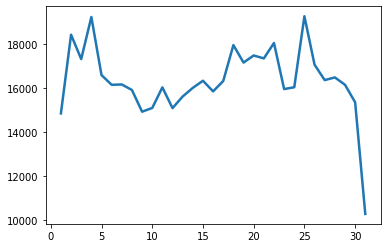

In [112]:
plt.figsize=(21, 21)
ax = sns.lineplot(data=plot[1:], palette="tab10", linewidth=2.5)
plt.show()

# Extra: Neural Net

In [34]:

from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import LSTM, SimpleRNN, Dense, PReLU, Dropout, Activation

In [ ]:
x_train = x_train.values
y_train = to_categorical(y_train)

In [68]:

y_test = to_categorical(y_test)

In [65]:
model = Sequential()

model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(70,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='hard_sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [66]:
model.fit(x_train, 
          y_train,
          batch_size=20000,
          epochs=30)

Epoch 1/30
472432/472432 [==============================] - 21s 45us/step - loss: 4.5461 - acc: 0.6949
Epoch 2/30
472432/472432 [==============================] - 18s 37us/step - loss: 1.2052 - acc: 0.9177
Epoch 3/30
472432/472432 [==============================] - 18s 39us/step - loss: 0.9253 - acc: 0.9377
Epoch 4/30
472432/472432 [==============================] - 15s 33us/step - loss: 0.8650 - acc: 0.9413
Epoch 5/30
472432/472432 [==============================] - 15s 32us/step - loss: 0.7917 - acc: 0.9472
Epoch 6/30
472432/472432 [==============================] - 18s 37us/step - loss: 0.7440 - acc: 0.9513
Epoch 7/30
472432/472432 [==============================] - 19s 39us/step - loss: 0.7193 - acc: 0.9531
Epoch 8/30
472432/472432 [==============================] - 19s 41us/step - loss: 0.6930 - acc: 0.9550
Epoch 9/30
472432/472432 [==============================] - 18s 39us/step - loss: 0.6791 - acc: 0.9561
Epoch 10/30
472432/472432 [==============================] - 19s 39us/ste

KeyboardInterrupt: 

In [69]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(x_test)
accuracy_score(y_predict, y_test)

0.9648118671046838